# Woring with BED files

## Beginning

One effective method to process BED files is to use **BEDTools**, which offers tools for a wide-range of genomics analysis tasks. 
These can be installed as a pre-compiled binary from their website and be used to process BEDfiles in the Terminal.
(https://bedtools.readthedocs.io/en/latest/)

To use the BEDTools commands in python the **pybedtools** Python package can be used to transform the Terminal commands into python functions and therefore more complexe pipelines and scripts can be generated. (https://daler.github.io/pybedtools/index.html)

In [2]:
import pybedtools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
path_01 = "/sybig/home/jme/Bachelorarbeit/Collect_Data/Test_BED_files/ARNT.bed"
path_02 = "/sybig/home/jme/Bachelorarbeit/Collect_Data/Test_BED_files/ASCL1.bed"

a = pybedtools.BedTool(path_01)
b = pybedtools.BedTool(path_02)

a_and_b = a.intersect(b)

print("\nARNT.bed")
a.head(2)

print("\nASCL1.bed")
b.head(2)

print("\nIntersect")
a_and_b.head(2)




ARNT.bed
chr1	827391	827499	.	0	+
 chr1	827504	827610	.	0	+
 
ASCL1.bed
chr1	633900	634013	.	0	+
 chr1	858778	858888	.	0	+
 
Intersect
chr1	910768	910824	.	0	+
 chr1	913807	913855	.	0	+
 

In [16]:
df = a.to_dataframe()
df["chrom"].unique()

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr14_GL000225v1_random', 'chr14_KI270722v1_random', 'chr15',
       'chr16', 'chr17', 'chr17_GL000205v2_random',
       'chr17_KI270729v1_random', 'chr18', 'chr19',
       'chr1_KI270713v1_random', 'chr2', 'chr20', 'chr21', 'chr22',
       'chr22_KI270732v1_random', 'chr22_KI270733v1_random',
       'chr22_KI270736v1_random', 'chr3', 'chr4',
       'chr4_GL000008v2_random', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9',
       'chr9_KI270718v1_random', 'chrM', 'chrUn_GL000195v1',
       'chrUn_GL000214v1', 'chrUn_GL000216v2', 'chrUn_GL000219v1',
       'chrUn_GL000220v1', 'chrUn_GL000224v1', 'chrUn_KI270303v1',
       'chrUn_KI270304v1', 'chrUn_KI270411v1', 'chrUn_KI270435v1',
       'chrUn_KI270438v1', 'chrUn_KI270442v1', 'chrUn_KI270465v1',
       'chrUn_KI270467v1', 'chrUn_KI270507v1', 'chrUn_KI270510v1',
       'chrUn_KI270515v1', 'chrUn_KI270538v1', 'chrUn_KI270744v1',
       'chrUn_KI270746v1', 'chrUn_KI270751v1', 'chr

In [19]:
test = pybedtools.BedTool("/sybig/home/jme/Bachelorarbeit/Collect_Data/Test_BED_files/ARNT_test.bed")
test.count()

97146

In [14]:
chr_ordered = np.array(["chr1", "chr2", "chr3", "chr4","chr5","chr6","chr7","chr8", "chr9","chr10","chr11","chr12","chr13","chr14","chr15","chr16","chr17","chr18","chr19", "chr20","chr21","chr22","chrX","chrY"])
c = a.filter(lambda x: np.isin(x.chrom, chr_ordered)).saveas("ARNT_filtered.bed")


In [119]:
ARNT_filter_path = "/sybig/home/jme/Bachelorarbeit/Collect_Data/ARNT_filtered.bed"
c.to_dataframe()

,chrom,start,end,name,score,strand
0,chr1,827391,827499,.,0,+
1,chr1,827504,827610,.,0,+
2,chr1,865784,865892,.,0,+
3,chr1,869795,869901,.,0,+
4,chr1,904640,904746,.,0,+
...,...,...,...,...,...,...
97141,chrY,16646113,16646219,.,0,-
97142,chrY,16831575,16831683,.,0,-
97143,chrY,56697203,56697309,.,0,-
97144,chrY,56707185,56707291,.,0,-


## Processing UniBind Data

The genomic Locations of all direct TFBS in the human genome of the robust collection are dowloanded from the UniBind Database.

In [14]:
import pybedtools

raw_UniBind_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/hg38_UniBind_allTFBSs.bed"

raw_UniBind = pybedtools.BedTool(raw_UniBind_path)

#count entrys of raw data needs ca 8 minutes. --> 97492844
#raw_UniBind.count()


FileNotFoundError: File "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/hg38_UniBind_allTFBSs.bed" does not exist

This data contains 97.492.844 genomic locations from chr1-chr22 and chrX and chrY, but unfortunaly also many locations which could not be assigned to any chromosome and will be refered as ChrUn or ChrN_random. Therefore the raw data will be filtered and saved in a new BED file.

In [82]:
# Filter the raw data and only save chr1-22 and chrX and chrY in BED file

chr_ordered = np.array(["chr1", "chr2", "chr3", "chr4","chr5","chr6","chr7","chr8", "chr9","chr10","chr11","chr12","chr13","chr14","chr15","chr16","chr17","chr18","chr19", "chr20","chr21","chr22","chrX","chrY"])
output = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/UniBind_allTFBS_filtered.bed"

data_unibind = raw_UniBind.filter(lambda x: np.isin(x.chrom, chr_ordered)).saveas(output)

In [3]:
path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/UniBind_TFBSs.bed"
tfbs_data = pybedtools.BedTool(path)


FileNotFoundError: File "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/UniBind_TFBSs.bed" does not exist

In [20]:
tfbs_test = tfbs_data[4]
print(tfbs_test.fields)

['chr1', '16243', '16262', 'EXP000597_HeLa-S3--cervical-adenocarcinoma-_CTCF_MA0139.1', '0', '+', '16243', '16262', '3,22,250']


## Processing RefSeq Data

### NCBI RefSeq

The RefSeq database includes genomic regions for all known genes in the human genome. 
These files are in GFF format and not in BED format, which means that it has completly different annotations (e.g. NC_000001.11 instead of chr1). 

But BedTools can also work with GFF files but it maybe more complicated in the future. 

In [2]:
refseq_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/ncbi_dataset/data/GCF_000001405.40/genomic.gff"
refseq = pybedtools.BedTool(refseq_path)

print(refseq[2])
refseq.count()

NC_000001.11	BestRefSeq	transcript	11874	14409	.	+	.	ID=rna-NR_046018.2;Parent=gene-DDX11L1;Dbxref=GeneID:100287102,GenBank:NR_046018.2,HGNC:HGNC:37102;Name=NR_046018.2;gbkey=misc_RNA;gene=DDX11L1;product=DEAD/H-box helicase 11 like 1 (pseudogene);pseudo=true;transcript_id=NR_046018.2



4900135

To process these data and have an insight its nice to use a dataframe

In [10]:
df_ncbi = refseq.to_dataframe()
df_ncbi.feature.unique()

array([nan, 'region', 'pseudogene', 'transcript', 'exon', 'gene',
       'primary_transcript', 'miRNA', 'enhancer', 'biological_region',
       'lnc_RNA', 'mRNA', 'CDS', 'snRNA', 'silencer',
       'transcriptional_cis_regulatory_region',
       'meiotic_recombination_region', 'repeat_instability_region',
       'nucleotide_motif', 'tandem_repeat', 'snoRNA', 'CAGE_cluster',
       'DNaseI_hypersensitive_site', 'epigenetically_modified_region',
       'ncRNA', 'antisense_RNA',
       'non_allelic_homologous_recombination_region', 'tRNA', 'promoter',
       'conserved_region', 'enhancer_blocking_element',
       'mobile_genetic_element', 'minisatellite', 'protein_binding_site',
       'locus_control_region', 'centromere', 'V_gene_segment',
       'response_element', 'TATA_box', 'sequence_comparison', 'rRNA',
       'sequence_feature', 'sequence_alteration', 'match', 'cDNA_match',
       'insulator', 'matrix_attachment_site', 'repeat_region',
       'regulatory_region', 'sequence_secondar

In [6]:
ncbi_transcripts_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/ncbi_dataset/ncbi_transcripts.gff"
ncbi_promotors_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/ncbi_dataset/ncbi_promotors.gff"
ncbi_CDS_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/ncbi_dataset/ncbi_CDS.gff"
ncbi_gene_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/ncbi_dataset/ncbi_gene.gff"


In [9]:
# Reducing refseq to transcripts:
refseq.filter(lambda x: x.fields[2] == "gene").saveas(ncbi_gene_path)

<BedTool(/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/ncbi_dataset/ncbi_gene.gff)>

In [11]:
ncbi_gene = pybedtools.BedTool(ncbi_gene_path)
ncbi_gene.count()

48104

The Dataset contains 4.900.135 entrys containing genomic locations for a wide range of diffrent sequence-labels. It contains 14.974 diffrent transcripts and 48.104 diffrent genes. (Also 438 promotor and 1.838.180 CDS) 

### UCSC RefGene

Maybe its simpler to use the UCSC RefGene Files, which are stored in a GTF format and only contains the curated genes. 

(In the end it has with 84.787 genomic locations, more gene entrys then ncbi (?))

In [13]:
ucsc_refseq_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/hg38.refGene.gtf"
ucsc_refseq = pybedtools.BedTool(ucsc_refseq_path)

interval = ucsc_refseq[0]
print(interval.fields)


['chr1', 'refGene', 'transcript', '11874', '14409', '.', '+', '.', 'gene_id "DDX11L1"; transcript_id "NR_046018";  gene_name "DDX11L1";']


In [36]:
ucsc_refseq.count()

1893860

To generate Promotors to each gene the exons are not necessary and the dataset can be reduced to the whole transcripts.

In [14]:
transcript = ucsc_refseq.filter(lambda x: x.fields[2] == "transcript").saveas("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/refGene_transcripts.gtf")

In [18]:
transcript_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/refGene_transcripts.gtf"
transcripts = pybedtools.BedTool(transcript_path)
transcripts.count()

84787

In [16]:
df = ucsc_refseq.to_dataframe()
df.feature.unique()

array(['transcript', 'exon', '5UTR', 'CDS', '3UTR', 'start_codon',
       'stop_codon'], dtype=object)

### Generating Promotors

The transcripts were filtered by chromosomes and only chr1-22 and X and Y remain. This was achieved using filter_BED_chrom.py

In [51]:
transcript_filter_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/refGene_transcripts_filtered.gtf"
transcripts_filter = pybedtools.BedTool(transcript_filter_path)
print(transcripts_filter[0])

chr1	refGene	transcript	11874	14409	.	+	.	gene_id "DDX11L1"; transcript_id "NR_046018";  gene_name "DDX11L1";



In [52]:
df_trans = transcripts_filter.to_dataframe()
df_trans.seqname.unique()

array(['chr1', 'chr18', 'chr19', 'chr8', 'chr17', 'chr7', 'chr16',
       'chr12', 'chrX', 'chr2', 'chr11', 'chr13', 'chr3', 'chr5', 'chr9',
       'chr22', 'chr4', 'chr6', 'chr14', 'chr21', 'chr10', 'chr15',
       'chr20', 'chrY'], dtype=object)

To define a promotor to each gene the flank method of bedtools can be used. This method extracts to each gene a 200bp region.

 With s=True it differs between the + and - strand. For a gene on the + strand it will take 200 bp upstream (left) and for an gene on the - strand it will take 200bp downstream (right).

In [65]:
flank_transcripts = transcripts_filter.flank(genome= "hg38", l=200, r=0, s=True).saveas("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/ucsc_promotor_regions.gtf")

In [66]:
print(transcripts_filter[0])
print(transcripts_filter[1])
print(transcripts_filter[2])


chr1	refGene	transcript	11874	14409	.	+	.	gene_id "DDX11L1"; transcript_id "NR_046018";  gene_name "DDX11L1";

chr1	refGene	transcript	14362	29370	.	-	.	gene_id "WASH7P"; transcript_id "NR_024540";  gene_name "WASH7P";

chr1	refGene	transcript	17369	17436	.	-	.	gene_id "MIR6859-1"; transcript_id "NR_106918";  gene_name "MIR6859-1";



In [67]:
print(flank_transcripts[0])
print(flank_transcripts[1])
print(flank_transcripts[2])

chr1	refGene	transcript	11674	11873	.	+	.	gene_id "DDX11L1"; transcript_id "NR_046018";  gene_name "DDX11L1";

chr1	refGene	transcript	29371	29570	.	-	.	gene_id "WASH7P"; transcript_id "NR_024540";  gene_name "WASH7P";

chr1	refGene	transcript	17437	17636	.	-	.	gene_id "MIR6859-1"; transcript_id "NR_106918";  gene_name "MIR6859-1";



In [ ]:
promotor = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/ucsc_promotor_regions.gtf")
print(promotor[0])

## Combining Promotors and TFBS

The next step is to define to each promotor the TFBSs that intersect with the promotor region.

### Testing with ARNT.bed

In [116]:
promotor.count()

74537

In [76]:
test_tfbs = pybedtools.BedTool("/sybig/home/jme/Bachelorarbeit/Collect_Data/Test_BED_files/ARNT.bed")

In [89]:
print(promotor[29])
print(test_tfbs[0])

chr1	refGene	transcript	827523	827722	.	-	.	gene_id "LINC00115"; transcript_id "NR_024321";  gene_name "LINC00115";

chr1	827391	827499	.	0	+



In [93]:
intersect = promotor.intersect(test_tfbs, wa=True, wb=True)

In [113]:
print(intersect[0])
print(intersect[0].start)

chr18	refGene	transcript	3449507	3449706	.	+	.	gene_id "TGIF1"; transcript_id "NM_173208";  gene_name "TGIF1";	chr18	3449572	3449678	.	0	-

3449506


In [166]:
test = promotor.filter(lambda x: x.chrom == "chr18" and x.start == 3449506).saveas("test.gtf")
print(test[0].fields)


['chr18', 'refGene', 'transcript', '3449507', '3449706', '.', '+', '.', 'gene_id "TGIF1"; transcript_id "NM_173208";  gene_name "TGIF1";']


In [167]:
test_merge = test.merge(s=True, c=[7,9] , o="distinct")
print(test_merge[0].fields)

['chr18', '3449506', '3449706', '+', 'gene_id "TGIF1"; transcript_id "NM_001278684";  gene_name "TGIF1";,gene_id "TGIF1"; transcript_id "NM_173208";  gene_name "TGIF1";,gene_id "TGIF1"; transcript_id "NM_173209";  gene_name "TGIF1";']


In [183]:
print(promotor[0].attrs.keys())

dict_keys(['gene_id', 'transcript_id', 'gene_name'])


# Processing Genexpression Data

## NIH Roadmap Consortium

The data from the NIH Roadmap Consortium provides the expression data for 19795 Genes in 56 tissues through the ENSEMBLE Gene ID. 

In [4]:
gen_expr_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/RNA_seq.csv"
gene_expr = pd.read_csv(gen_expr_path)

In [45]:
ens_ids = gene_expr["Unnamed: 0"].to_numpy()

np.unique([x[3] for x in ens_ids])
gene_expr

,Unnamed: 0,E003,E004,E005,E006,E007,E011,E012,E013,E016,...,E114,E116,E117,E118,E119,E120,E122,E123,E127,E128
0,ENSG00000000003,43.985,37.413,29.459,21.864,55.649,52.940,71.629,61.292,44.280,...,37.989,0.038,42.639,49.983,11.554,11.847,43.723,0.267,13.758,15.818
1,ENSG00000000005,1.642,6.498,0.000,0.157,0.003,0.115,0.087,0.055,1.577,...,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.006,0.000,0.000
2,ENSG00000000419,35.259,58.308,48.208,37.477,45.923,44.959,40.438,41.970,51.515,...,52.215,79.197,107.098,62.811,42.386,54.869,16.652,73.719,56.578,56.371
3,ENSG00000000457,2.596,2.345,8.775,2.723,3.700,3.912,5.011,4.158,3.292,...,4.829,11.082,8.814,2.646,2.483,2.527,2.549,7.651,4.967,3.714
4,ENSG00000000460,6.649,7.838,7.324,0.830,5.354,5.940,5.704,6.213,7.551,...,8.001,13.743,25.369,3.373,4.646,2.179,4.099,22.103,3.290,2.491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19790,ENSG00000259718,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
19791,ENSG00000259741,10.639,22.017,19.103,26.684,21.748,23.737,24.791,23.581,18.816,...,74.923,22.036,23.527,16.770,25.595,57.260,15.039,8.164,31.558,57.093
19792,ENSG00000259752,0.032,0.008,0.042,0.015,0.067,0.033,0.078,0.047,0.000,...,0.014,0.091,0.028,0.072,0.012,0.046,0.017,0.066,0.040,0.000
19793,ENSG00000259765,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## NIH GTEx project

A closer look at the data shows that it only contains Expression for ENSEMBLE IDs which could have multiple transcripts. The Expression could therefore not be assigned to specific genomic locations provided by the RefSeq Data. 

The NIH Genotype-Tissue Expression (GTEx) project shows median gene expression levels in 52 tissues and 2 cell lines, based on RNA-seq data. These Exrpression are assigned to a specific genomic location and could therefore directly be used to define promotors and TFBS sets. 

In [4]:
gtex_path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/gtex/gtexGeneV8.txt"

gtex = pybedtools.BedTool(gtex_path)

In [5]:
df_gtex = gtex.to_dataframe()
df_gtex

,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount
0,chr1,11868,14403,DDX11L1,11,+,ENSG00000223972.5,transcribed_unprocessed_pseudogene,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,chr1,14409,29553,WASH7P,365,-,ENSG00000227232.5,unprocessed_pseudogene,54,"4.064,3.371,2.686,4.048,3.901,3.64,5.164,1.438..."
2,chr1,17368,17436,MIR6859-1,0,-,ENSG00000278267.1,miRNA,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
3,chr1,29570,31109,MIR1302-2HG,16,+,ENSG00000243485.5,lincRNA,54,"0,0,0,0,0,0,0,0,0,0.024,0,0,0.027,0.03,0,0.025..."
4,chr1,34553,36081,FAM138A,0,-,ENSG00000237613.2,lincRNA,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
...,...,...,...,...,...,...,...,...,...,...
56195,chrY,57171889,57172769,TRPC6P,0,-,ENSG00000223484.7_PAR_Y,processed_pseudogene,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
56196,chrY,57184100,57197337,IL9R,0,+,ENSG00000124334.17_PAR_Y,protein_coding,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
56197,chrY,57201142,57203357,WASIR1,0,-,ENSG00000185203.12_PAR_Y,antisense,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
56198,chrY,57207345,57212183,WASH6P,0,+,ENSG00000182484.15_PAR_Y,transcribed_unprocessed_pseudogene,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."


In [55]:
df_gtex.thickEnd.unique()


array(['transcribed_unprocessed_pseudogene', 'unprocessed_pseudogene',
       'miRNA', 'lincRNA', 'protein_coding', 'processed_pseudogene',
       'antisense', 'processed_transcript', 'snRNA',
       'transcribed_processed_pseudogene', 'sense_intronic', 'TEC',
       'transcribed_unitary_pseudogene', 'misc_RNA', 'snoRNA', 'scaRNA',
       'rRNA', 'unitary_pseudogene', '3prime_overlapping_ncRNA',
       'polymorphic_pseudogene', 'bidirectional_promoter_lncRNA',
       'sense_overlapping', 'pseudogene', 'IG_V_pseudogene', 'ribozyme',
       'sRNA', 'non_coding', 'macro_lncRNA', 'TR_V_gene',
       'TR_V_pseudogene', 'TR_D_gene', 'TR_J_gene', 'TR_C_gene',
       'TR_J_pseudogene', 'IG_C_gene', 'IG_C_pseudogene', 'IG_J_gene',
       'IG_J_pseudogene', 'IG_D_gene', 'IG_V_gene', 'IG_pseudogene',
       'scRNA', 'vaultRNA', 'Mt_tRNA', 'Mt_rRNA'], dtype=object)

/tmp/ipykernel_2348076/1550584354.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


thickEnd
protein_coding            19291
processed_pseudogene      10141
lincRNA                    7433
antisense                  5220
unprocessed_pseudogene     2650
misc_RNA                   2007
snRNA                      1864
miRNA                      1576
TEC                        1033
Other                      4096
Name: GENCODE gene biotype, dtype: int64

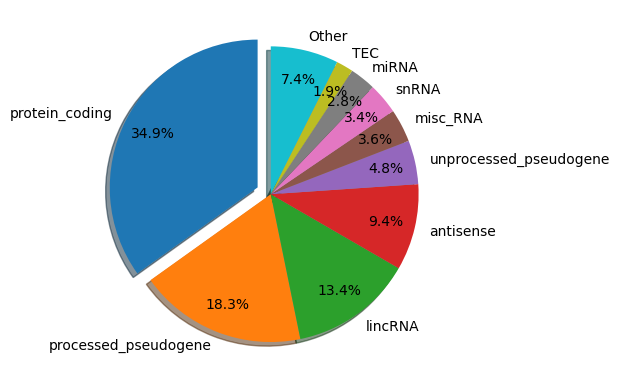

In [77]:
count_genetype = df_gtex["thickEnd"].value_counts()
count_genetype.name = "GENCODE gene biotype"

relevant = count_genetype[:9]
other = count_genetype[10:].sum()
relevant["Other"] = other

fig = plt.figure()
relevant.plot.pie(figsize=(6,6), subplots=True, explode=[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], shadow = True, startangle= 90, autopct='%1.1f%%',  pctdistance=0.8, labeldistance=1.1)
plt.ylabel("")
fig.show()
#fig.savefig("GTEx_genetype_count_pie.png")
relevant

## Processing GTEx and defining promotors

In order to map the TFBS to the genomic regions it is impirtant to define promotor regions for the specific genes or transcripts.


In [11]:
gtex.head()

chr1	11868	14403	DDX11L1	11	+	ENSG00000223972.5	transcribed_unprocessed_pseudogene	54	0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.166,0,0,0,0,
 chr1	14409	29553	WASH7P	365	-	ENSG00000227232.5	unprocessed_pseudogene	54	4.064,3.371,2.686,4.048,3.901,3.64,5.164,1.438,1.693,1.566,4.992,5.721,2.483,2.147,1.686,1.748,1.539,1.442,2.73,1.742,4.439,2.494,1.679,5.629,7.098,4.648,3.595,4.326,3.117,4.103,6.134,1.52,0.925,2.771,2.215,1.765,4.508,3.527,1.417,6.685,6.634,1.808,5.425,7.083,5.933,6.133,4.194,5.926,3.062,4.703,6.273,7.19,5.745,2.647,
 chr1	17368	17436	MIR6859-1	0	-	ENSG00000278267.1	miRNA	54	0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 chr1	29570	31109	MIR1302-2HG	16	+	ENSG00000243485.5	lincRNA	54	0,0,0,0,0,0,0,0,0,0.024,0,0,0.027,0.03,0,0.025,0.031,0.023,0,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0.018,0.018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.054,0,0,0,0,
 chr1	34553	36081	FAM138A	

In [12]:
promotors_gtex = gtex.flank(genome= "hg38", l=200, r=0, s=True).saveas("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/GTEx_Promotors.bed")

In [5]:
promotors_gtex = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/GTEx_Promotors.bed")
promotors_gtex.head()

chr1	11668	11868	DDX11L1	11	+	ENSG00000223972.5	transcribed_unprocessed_pseudogene	54	0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.166,0,0,0,0,
 chr1	29553	29753	WASH7P	365	-	ENSG00000227232.5	unprocessed_pseudogene	54	4.064,3.371,2.686,4.048,3.901,3.64,5.164,1.438,1.693,1.566,4.992,5.721,2.483,2.147,1.686,1.748,1.539,1.442,2.73,1.742,4.439,2.494,1.679,5.629,7.098,4.648,3.595,4.326,3.117,4.103,6.134,1.52,0.925,2.771,2.215,1.765,4.508,3.527,1.417,6.685,6.634,1.808,5.425,7.083,5.933,6.133,4.194,5.926,3.062,4.703,6.273,7.19,5.745,2.647,
 chr1	17436	17636	MIR6859-1	0	-	ENSG00000278267.1	miRNA	54	0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 chr1	29370	29570	MIR1302-2HG	16	+	ENSG00000243485.5	lincRNA	54	0,0,0,0,0,0,0,0,0,0.024,0,0,0.027,0.03,0,0.025,0.031,0.023,0,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0.018,0.018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.054,0,0,0,0,
 chr1	36081	36281	FAM138A	

## Assign TFBS to Promotors

In [3]:
# promotors intersect TFBS (-wa, -wb) --> get promotors back, which had intersection with additional infos about TFBS
# maybe first should TFBS should be filtered, who intersect with something (TFBS intersect promotors (-wa) (?))
# reduce_tfbs = tfbs_data.intersect(promotors_gtex, wa=True).saveas("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/tfbs_intersect_promotors_wa.bed")
reduce_tfbs = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/tfbs_intersect_promotors_wa.bed")

In [13]:
df_tfbs = reduce_tfbs.to_dataframe()

In [16]:
df_tfbs

,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb
0,chr1,17510,17522,EXP038397_NGP--neuroblastoma-_MYCN_MA0104.4,0,-,17510,17522,"126,46,9"
1,chr1,629638,629650,EXP036801_HUES64--embryonic-stem-cells-_OTX2_M...,0,-,629638,629650,"207,77,229"
2,chr1,634195,634206,EXP039511_HEK293--embryonic-kidney-_EGR2_MA0472.2,0,+,634195,634206,"124,130,29"
3,chr1,758332,758344,EXP038043_HAEC--human-aortic-endothelial-cells...,0,+,758332,758344,"161,131,62"
4,chr1,758332,758345,EXP038043_HAEC--human-aortic-endothelial-cells...,0,-,758332,758345,"161,131,62"
...,...,...,...,...,...,...,...,...,...
3667829,chrY,24570023,24570035,EXP038436_VCaP--prostate-carcinoma-_FOXA1_MA01...,0,-,24570023,24570035,"36,21,55"
3667830,chrY,26360803,26360816,EXP038206_D341-Med--medulloblastoma-_NEUROD1_M...,0,-,26360803,26360816,"61,116,208"
3667831,chrY,26453785,26453805,EXP047817_THP-1--acute-monocytic-leukemia-_SPI...,0,-,26453785,26453805,"25,62,61"
3667832,chrY,26453785,26453805,EXP047818_THP-1--acute-monocytic-leukemia-_SPI...,0,-,26453785,26453805,"25,62,61"
